## Final Project Submission

Please fill out:
* Student name: John Lemaster
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL:


# A note about the data & the project

NEED TO REWRITE BELOW.  came from https://www.kaggle.com/rahulsah06/bike-buying-prediction-for-adventure-works-cycles

Description Of Data - In 1998, the Adventure Works Cycles company collected a large volume of data about their existing customers, including demographic features and information about purchases they have made. The company is particularly interested in analyzing customer data to determine any apparent relationships between demographic features known about the customers and the likelihood of a customer purchasing a bike. Additionally, the analysis should endeavor to determine whether a customer's average monthly spend with the company can be predicted from known customer characteristics. Problem Statement - Creating a classification model that predicts whether or not a customer will purchase a bike. The model should predict bike purchasing for new customers for whom no information about average monthly spend or previous bike purchases is available.

# Business Case

Predict with customer demographic data features who are potential new customers are to purchase bikes.  

Prob use random forest for above



# OBTAIN

## Imports

In [1]:
import pandas as pd
import glob

In [2]:
import os


In [3]:
import numpy as np 

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.preprocessing import OneHotEncoder
from IPython.display import Image  
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [4]:
# showing all cols

pd.set_option('display.max_columns', 0)

In [5]:
df= pd.read_csv('combined_data.csv', index_col=0)

In [6]:
data_folder = '../bike-buying-prediction-for-adventure-works-cycles/'
files = glob.glob(data_folder+'*csv')
files

['../bike-buying-prediction-for-adventure-works-cycles/AW_BikeBuyer.csv',
 '../bike-buying-prediction-for-adventure-works-cycles/AdvWorksCusts.csv',
 '../bike-buying-prediction-for-adventure-works-cycles/AW_test.csv',
 '../bike-buying-prediction-for-adventure-works-cycles/AW_AveMonthSpend.csv']

In [7]:
df_buyer = pd.read_csv(files[0])
df_buyer

,CustomerID,BikeBuyer
0,11000,0
1,11001,1
2,11002,0
3,11003,0
4,11004,1
...,...,...
16514,13121,0
16515,26100,0
16516,11328,0
16517,23077,0


In [8]:
#df.head()

In [9]:
#df2 = pd.read_csv(files[-1])
#df2.head()

In [10]:
#df = df.merge(df2, on ='CustomerID')

In [11]:
# df.to_csv('combined_data.csv')

In [12]:
df

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,target,AveMonthSpend
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,0,89
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,1,117
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,0,123
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,0,50
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,1,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16744,29478,NaN,Darren,D,Carlson,NaN,5240 Premier Pl.,NaN,Stoke-on-Trent,England,United Kingdom,AS23,1 (11) 500 555-0132,1959-05-25,Graduate Degree,Clerical,M,S,1,0,0,3,45986,0,65
16745,29479,NaN,Tommy,L,Tang,NaN,"111, rue Maillard",NaN,Versailles,Yveline,France,78000,1 (11) 500 555-0136,1958-07-04,Graduate Degree,Clerical,M,M,1,0,0,1,80049,0,77
16746,29480,NaN,Nina,W,Raji,NaN,9 Katherine Drive,NaN,London,England,United Kingdom,SW19 3RU,1 (11) 500 555-0146,1960-11-10,Graduate Degree,Clerical,F,S,1,0,0,3,60417,1,48
16747,29481,NaN,Ivan,NaN,Suri,NaN,Knaackstr 4,NaN,Hof,Bayern,Germany,95010,1 (11) 500 555-0144,1960-01-05,Graduate Degree,Clerical,M,S,0,0,0,3,66653,0,65


# SCRUB/EXPLORE

### Initial DataFrame

In [13]:
df

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,CountryRegionName,PostalCode,PhoneNumber,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,target,AveMonthSpend
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,Australia,4700,1 (11) 500 555-0162,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,0,89
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,Australia,3198,1 (11) 500 555-0110,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,1,117
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,Australia,7001,1 (11) 500 555-0184,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,0,123
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,Australia,2113,1 (11) 500 555-0162,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,0,50
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,Australia,2500,1 (11) 500 555-0131,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,1,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16744,29478,NaN,Darren,D,Carlson,NaN,5240 Premier Pl.,NaN,Stoke-on-Trent,England,United Kingdom,AS23,1 (11) 500 555-0132,1959-05-25,Graduate Degree,Clerical,M,S,1,0,0,3,45986,0,65
16745,29479,NaN,Tommy,L,Tang,NaN,"111, rue Maillard",NaN,Versailles,Yveline,France,78000,1 (11) 500 555-0136,1958-07-04,Graduate Degree,Clerical,M,M,1,0,0,1,80049,0,77
16746,29480,NaN,Nina,W,Raji,NaN,9 Katherine Drive,NaN,London,England,United Kingdom,SW19 3RU,1 (11) 500 555-0146,1960-11-10,Graduate Degree,Clerical,F,S,1,0,0,3,60417,1,48
16747,29481,NaN,Ivan,NaN,Suri,NaN,Knaackstr 4,NaN,Hof,Bayern,Germany,95010,1 (11) 500 555-0144,1960-01-05,Graduate Degree,Clerical,M,S,0,0,0,3,66653,0,65


### Target Value Counts (Ones are Buyers)
0 are non-buyers (67%)
1 are buyers (33%)


In [14]:
df['target'].value_counts(normalize=True)

0    0.66798
1    0.33202
Name: target, dtype: float64

## Null Values

In [15]:
df.isnull().sum().divide(len(df))

CustomerID              0.000000
Title                   0.994746
FirstName               0.000000
MiddleName              0.421100
LastName                0.000000
Suffix                  0.999881
AddressLine1            0.000000
AddressLine2            0.983223
City                    0.000000
StateProvinceName       0.000000
CountryRegionName       0.000000
PostalCode              0.000000
PhoneNumber             0.000000
BirthDate               0.000000
Education               0.000000
Occupation              0.000000
Gender                  0.000000
MaritalStatus           0.000000
HomeOwnerFlag           0.000000
NumberCarsOwned         0.000000
NumberChildrenAtHome    0.000000
TotalChildren           0.000000
YearlyIncome            0.000000
target                  0.000000
AveMonthSpend           0.000000
dtype: float64

## Drop Columns

In [16]:
df.drop(['Title', 'FirstName', 'MiddleName', 
         'LastName', 'Suffix', 'AddressLine1', 
         'AddressLine2', 'PhoneNumber', 'PostalCode'], axis=1, inplace=True)

In [17]:
df

,CustomerID,City,StateProvinceName,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,target,AveMonthSpend
0,11000,Rockhampton,Queensland,Australia,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947,0,89
1,11001,Seaford,Victoria,Australia,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141,1,117
2,11002,Hobart,Tasmania,Australia,1965-08-12,Bachelors,Professional,M,M,1,1,3,3,91945,0,123
3,11003,North Ryde,New South Wales,Australia,1968-02-15,Bachelors,Professional,F,S,0,1,0,0,86688,0,50
4,11004,Wollongong,New South Wales,Australia,1968-08-08,Bachelors,Professional,F,S,1,4,5,5,92771,1,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16744,29478,Stoke-on-Trent,England,United Kingdom,1959-05-25,Graduate Degree,Clerical,M,S,1,0,0,3,45986,0,65
16745,29479,Versailles,Yveline,France,1958-07-04,Graduate Degree,Clerical,M,M,1,0,0,1,80049,0,77
16746,29480,London,England,United Kingdom,1960-11-10,Graduate Degree,Clerical,F,S,1,0,0,3,60417,1,48
16747,29481,Hof,Bayern,Germany,1960-01-05,Graduate Degree,Clerical,M,S,0,0,0,3,66653,0,65


In [18]:
df.isnull().sum()

CustomerID              0
City                    0
StateProvinceName       0
CountryRegionName       0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
target                  0
AveMonthSpend           0
dtype: int64

## Find Categorical & Numerical Values

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16749 entries, 0 to 16748
Data columns (total 16 columns):
CustomerID              16749 non-null int64
City                    16749 non-null object
StateProvinceName       16749 non-null object
CountryRegionName       16749 non-null object
BirthDate               16749 non-null object
Education               16749 non-null object
Occupation              16749 non-null object
Gender                  16749 non-null object
MaritalStatus           16749 non-null object
HomeOwnerFlag           16749 non-null int64
NumberCarsOwned         16749 non-null int64
NumberChildrenAtHome    16749 non-null int64
TotalChildren           16749 non-null int64
YearlyIncome            16749 non-null int64
target                  16749 non-null int64
AveMonthSpend           16749 non-null int64
dtypes: int64(8), object(8)
memory usage: 2.2+ MB


In [20]:
#set index to customer id

df.set_index('CustomerID', inplace=True)

In [21]:
df['BirthDate'] = df['BirthDate'].str.split("-").apply(lambda x: x[0]).astype(int)

In [22]:
df['BirthDate']

CustomerID
11000    1966
11001    1965
11002    1965
11003    1968
11004    1968
         ... 
29478    1959
29479    1958
29480    1960
29481    1960
29482    1959
Name: BirthDate, Length: 16749, dtype: int64

In [23]:
df['Age'] = 2020 - df['BirthDate']
df.drop('BirthDate' , inplace=True, axis=1)

In [24]:
df

,City,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,target,AveMonthSpend,Age
CustomerID,,,,,,,,,,,,,,,
11000,Rockhampton,Queensland,Australia,Bachelors,Professional,M,M,1,0,0,2,137947,0,89,54
11001,Seaford,Victoria,Australia,Bachelors,Professional,M,S,0,1,3,3,101141,1,117,55
11002,Hobart,Tasmania,Australia,Bachelors,Professional,M,M,1,1,3,3,91945,0,123,55
11003,North Ryde,New South Wales,Australia,Bachelors,Professional,F,S,0,1,0,0,86688,0,50,52
11004,Wollongong,New South Wales,Australia,Bachelors,Professional,F,S,1,4,5,5,92771,1,95,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29478,Stoke-on-Trent,England,United Kingdom,Graduate Degree,Clerical,M,S,1,0,0,3,45986,0,65,61
29479,Versailles,Yveline,France,Graduate Degree,Clerical,M,M,1,0,0,1,80049,0,77,62
29480,London,England,United Kingdom,Graduate Degree,Clerical,F,S,1,0,0,3,60417,1,48,60


### Seperate categoricals vs numbers

In [25]:
# Categorical 
catag_cols = df.select_dtypes('object').columns

In [26]:
catag_cols

Index(['City', 'StateProvinceName', 'CountryRegionName', 'Education',
       'Occupation', 'Gender', 'MaritalStatus'],
      dtype='object')

In [27]:
#Number cols to scale
number_cols = df.select_dtypes('number').columns


In [28]:
number_cols

Index(['HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome',
       'TotalChildren', 'YearlyIncome', 'target', 'AveMonthSpend', 'Age'],
      dtype='object')

In [29]:
# Finding unique categorical 
for col in catag_cols:
    print(col)
    print(df[col].nunique())

City
270
StateProvinceName
52
CountryRegionName
6
Education
5
Occupation
5
Gender
2
MaritalStatus
2


### One Hot Encoding

In [30]:
df = pd.get_dummies(df, columns=catag_cols)

In [31]:
df.head()

,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,target,AveMonthSpend,Age,City_Ballard,City_Baltimore,City_Barstow,City_Basingstoke Hants,City_Baytown,City_Beaverton,City_Bell Gardens,City_Bellevue,City_Bellflower,City_Bellingham,City_Bendigo,City_Berkeley,City_Berks,City_Berkshire,City_Berlin,City_Beverly Hills,City_Billericay,City_Biloxi,City_Birmingham,City_Bluffton,City_Bobigny,City_Bonn,City_Bothell,City_Bottrop,City_Boulogne-Billancourt,City_Boulogne-sur-Mer,City_Bountiful,City_Bracknell,City_Bradenton,City_Braintree,City_Branch,City_Branson,City_Braunschweig,City_Bremerton,City_Brisbane,City_Burbank,City_Burien,City_Burlingame,City_Burnaby,City_Bury,City_Byron,City_Calgary,...,StateProvinceName_Minnesota,StateProvinceName_Mississippi,StateProvinceName_Missouri,StateProvinceName_Moselle,StateProvinceName_New South Wales,StateProvinceName_New York,StateProvinceName_Nord,StateProvinceName_Nordrhein-Westfalen,StateProvinceName_North Carolina,StateProvinceName_Ohio,StateProvinceName_Oregon,StateProvinceName_Pas de Calais,StateProvinceName_Queensland,StateProvinceName_Saarland,StateProvinceName_Seine (Paris),StateProvinceName_Seine Saint Denis,StateProvinceName_Seine et Marne,StateProvinceName_Somme,StateProvinceName_South Australia,StateProvinceName_South Carolina,StateProvinceName_Tasmania,StateProvinceName_Texas,StateProvinceName_Utah,StateProvinceName_Val d'Oise,StateProvinceName_Val de Marne,StateProvinceName_Victoria,StateProvinceName_Virginia,StateProvinceName_Washington,StateProvinceName_Wyoming,StateProvinceName_Yveline,CountryRegionName_Australia,CountryRegionName_Canada,CountryRegionName_France,CountryRegionName_Germany,CountryRegionName_United Kingdom,CountryRegionName_United States,Education_Bachelors,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11000,1,0,0,2,137947,0,89,54,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
11001,0,1,3,3,101141,1,117,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
11002,1,1,3,3,91945,0,123,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
11003,0,1,0,0,86688,0,50,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
11004,1,4,5,5,92771,1,95,52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1


## Scale Data

In [32]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [33]:
scaler = StandardScaler()

In [34]:
df_scaled = df.copy()

In [35]:
df_scaled[number_cols] = scaler.fit_transform(df_scaled[number_cols])

In [36]:
df_scaled

,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,target,AveMonthSpend,Age,City_Ballard,City_Baltimore,City_Barstow,City_Basingstoke Hants,City_Baytown,City_Beaverton,City_Bell Gardens,City_Bellevue,City_Bellflower,City_Bellingham,City_Bendigo,City_Berkeley,City_Berks,City_Berkshire,City_Berlin,City_Beverly Hills,City_Billericay,City_Biloxi,City_Birmingham,City_Bluffton,City_Bobigny,City_Bonn,City_Bothell,City_Bottrop,City_Boulogne-Billancourt,City_Boulogne-sur-Mer,City_Bountiful,City_Bracknell,City_Bradenton,City_Braintree,City_Branch,City_Branson,City_Braunschweig,City_Bremerton,City_Brisbane,City_Burbank,City_Burien,City_Burlingame,City_Burnaby,City_Bury,City_Byron,City_Calgary,...,StateProvinceName_Minnesota,StateProvinceName_Mississippi,StateProvinceName_Missouri,StateProvinceName_Moselle,StateProvinceName_New South Wales,StateProvinceName_New York,StateProvinceName_Nord,StateProvinceName_Nordrhein-Westfalen,StateProvinceName_North Carolina,StateProvinceName_Ohio,StateProvinceName_Oregon,StateProvinceName_Pas de Calais,StateProvinceName_Queensland,StateProvinceName_Saarland,StateProvinceName_Seine (Paris),StateProvinceName_Seine Saint Denis,StateProvinceName_Seine et Marne,StateProvinceName_Somme,StateProvinceName_South Australia,StateProvinceName_South Carolina,StateProvinceName_Tasmania,StateProvinceName_Texas,StateProvinceName_Utah,StateProvinceName_Val d'Oise,StateProvinceName_Val de Marne,StateProvinceName_Victoria,StateProvinceName_Virginia,StateProvinceName_Washington,StateProvinceName_Wyoming,StateProvinceName_Yveline,CountryRegionName_Australia,CountryRegionName_Canada,CountryRegionName_France,CountryRegionName_Germany,CountryRegionName_United Kingdom,CountryRegionName_United States,Education_Bachelors,Education_Graduate Degree,Education_High School,Education_Partial College,Education_Partial High School,Occupation_Clerical,Occupation_Management,Occupation_Manual,Occupation_Professional,Occupation_Skilled Manual,Gender_F,Gender_M,MaritalStatus_M,MaritalStatus_S
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11000,0.696305,-1.320438,-0.655315,-0.005710,1.508094,-0.705018,0.606392,-0.398053,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
11001,-1.436153,-0.442156,1.322913,0.588291,0.580465,1.418403,1.631466,-0.309197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1
11002,0.696305,-0.442156,1.322913,0.588291,0.348696,-0.705018,1.851125,-0.309197,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
11003,-1.436153,-0.442156,-0.655315,-1.193712,0.216203,-0.705018,-0.821389,-0.575763,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
11004,0.696305,2.192690,2.641731,1.776294,0.369514,1.418403,0.826051,-0.575763,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29478,0.696305,-1.320438,-0.655315,0.588291,-0.809617,-0.705018,-0.272242,0.223934,0,0,0,0,0

# MODEL

## First Model: Decision Tree

 ### Train Test Split

In [37]:
# Create features and label/target
X = df.drop('target', axis=1)  
y = df['target'] 

In [38]:
# An 80/20 split with random_state of 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)


In [39]:
# Train Decesion Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=10)  
dt_classifier.fit(X_train, y_train) 

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [40]:
# Make predictions for test data
y_pred = dt_classifier.predict(X_test)

### Evaluate Model
Accuracy, AUC & Confusion Matrix Results

In [63]:
def evaluate_model(X_test, y_test, classifier):

    from sklearn.metrics import plot_confusion_matrix

    # Make predictions for test data
    y_pred = classifier.predict(X_test)

    # Calculate accuracy 
    acc = accuracy_score(y_test,y_pred) * 100
    print('Accuracy is :{0}'.format(round(acc, 2)))

    # Check the AUC for predictions
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('\nAUC is :{0}'.format(round(roc_auc, 2)))

    # Create and print a confusion matrix 
    print('\nConfusion Matrix')
    print('----------------')
    pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

    # Create Confusion Matrix
    plot_confusion_matrix(classifier, X_test, y_test, normalize='true', cmap='Blues')
    plt.show()

Accuracy is :75.1

AUC is :0.72

Confusion Matrix
----------------


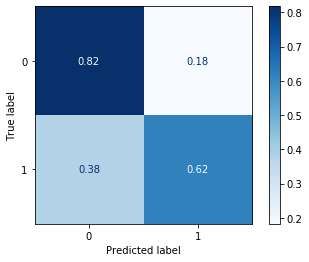

In [64]:
evaluate_model(X_test, y_test, dt_classifier)

### Feature Importance Visualization: Decision Tree

In [43]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    sort = pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False).head(10)
    sort.plot(kind ='barh')
    #plt.figure(figsize=(12,60))
    #plt.barh(range(n_features), sort, align='center') 
    #plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')


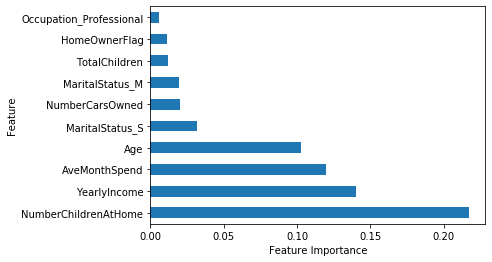

In [44]:
plot_feature_importances(dt_classifier)

## GridsearchCV

In [45]:
# Perform a 3-fold cross-validation on the training data 
# using the dt_classifier (from last section)

dt_cv_score = cross_val_score(dt_classifier, X_train, y_train, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 74.27%


In [46]:
# Need to create a dictionary for Combinatoric Grid Searching

dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6]
}

# Instantiate GridSearchCV
dt_grid_search = GridSearchCV(dt_classifier, dt_param_grid, cv=3, return_train_score=True)

# Fit to the data
dt_grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=10,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [47]:
# Mean training score
dt_gs_training_score = np.mean(dt_grid_search.cv_results_['mean_train_score'])

# Mean test score
dt_gs_testing_score = dt_grid_search.score(X_test, y_test)

print(f"Mean Training Score: {dt_gs_training_score :.2%}")
print(f"Mean Test Score: {dt_gs_testing_score :.2%}")
print("Best Parameter Combination Found During Grid Search:")
dt_grid_search.best_params_

Mean Training Score: 80.89%
Mean Test Score: 79.25%
Best Parameter Combination Found During Grid Search:


{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

## Second Model: Bagging Classifier

### Imports for Model

In [48]:
np.random.seed(0)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

### BaggingClassifier

In [49]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [50]:
# Fit to the training data
bagged_tree.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
   

### BaggingClassifier Training Accuracy Score

In [51]:
# Training accuracy score
bagged_tree.score(X_train, y_train)

0.7992387491603851

### BaggingClassifier Test Accuracy Score
(the accuracy score that really matters) 



In [52]:
# Test accuracy score
bagged_tree.score(X_test, y_test)

0.7952238805970149

## Third Model:  Random Forest

In [53]:
# Instantiate and fit a RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Training Accuracy Score

In [54]:
# Training accuracy score
forest.score(X_train, y_train)

0.7583401746398984

### Test Accuracy Score

In [55]:
# Test accuracy score
forest.score(X_test, y_test)

0.7588059701492538

### Evaluate Model
Accuracy, AUC & Confusion Matrix Results

Accuracy is :75.88

AUC is :0.65

Confusion Matrix
----------------


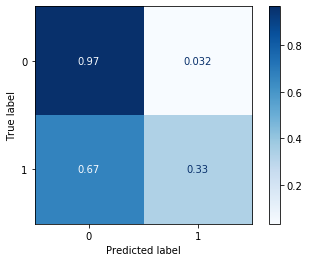

In [65]:
evaluate_model(X_test, y_test, forest)

### Feature Importance Visualization

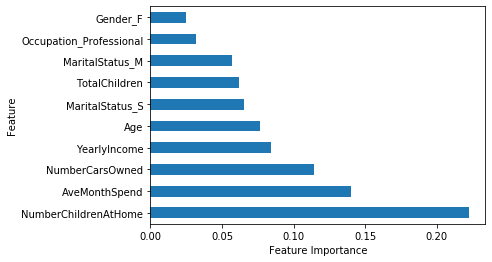

In [56]:
plot_feature_importances(forest)

## Fourth Model: XGBoost

### Imports for this model

In [59]:
from xgboost import XGBClassifier

### Fit
### Predict
### Training and Test Accuracy Scores

In [61]:
# Instantiate XGBClassifier
xgb = XGBClassifier()

# Fit XGBClassifier
xgb.fit(X_train, y_train)

# Predict on training and test sets
training_preds = xgb.predict(X_train)
test_preds = xgb.predict(X_test)

# Accuracy of training and test sets
training_accuracy = accuracy_score(y_train, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Test Accuracy: {:.4}%'.format(test_accuracy * 100))

Training Accuracy: 80.46%
Test Accuracy: 79.94%


### Evaluate Model
Accuracy, AUC & Confusion Matrix Results

Accuracy is :79.94

AUC is :0.74

Confusion Matrix
----------------


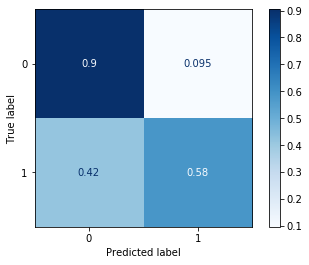

In [66]:
evaluate_model(X_test, y_test, xgb)

### Feature Importance Visualization

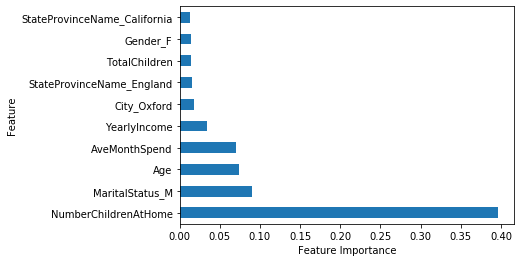

In [62]:
plot_feature_importances(xgb)

# INTERPRET 